# Mushroom Classification: Poisonous or Edible
By Darshik A S

## 1. Setting Environment

In [196]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest, chi2
import warnings
warnings.filterwarnings('ignore')
sns.set_style("whitegrid", {'grid.linestyle': '--'})
sns.set_context("notebook")

## 2. Data Overview

The dataset includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family. Each species is identified as edible, poisonous.

Features and lables
1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
4. bruises?: bruises=t,no=f
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. gill-attachment: attached=a,descending=d,free=f,notched=n
7. gill-spacing: close=c,crowded=w,distant=d
8. gill-size: broad=b,narrow=n
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
10. stalk-shape: enlarging=e,tapering=t
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
16. veil-type: partial=p,universal=u
17. veil-color: brown=n,orange=o,white=w,yellow=y
18. ring-number: none=n,one=o,two=t
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

In [130]:
# Load data in Pandas Dataframe
data = pd.read_csv('agaricus-lepiota.data.csv')
data.head()

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


In [131]:
col_names = [
    'class',
    'cap_shape',
    'cap_surface',
    'cap_color',
    'bruises',
    'odor',
    'gill_attacthment',
    'gill_spacing',
    'gill_size',
    'gill_color',
    'stalk_shape',
    'stalk_root',
    'stalk_surface_above_ring',
    'stalk_surface_below_ring',
    'stalk_color_above_ring',
    'stalk_color_below_ring',
    'veil_type',
    'veil_color',
    'ring_number',
    'ring_type',
    'spore_print_color',
    'population',
    'habitat'
]

In [132]:
# Changing attribute names
data.columns = col_names
print(data.columns)

Index(['class', 'cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor',
       'gill_attacthment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat'],
      dtype='object')


In [133]:
print(data.shape)

(8123, 23)


The dataset contains 8123 observations and 23 attributes

## 3. Data Preparation

In [134]:
# Checking for null values in each attribute
data.isnull().sum(axis=0)

class                       0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attacthment            0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
dtype: int64

In [135]:
# Checking for duplicates
data.duplicated().sum()

0

In [136]:
# Checking for missing data in the dataset (denoted by '?')
for i in data.columns:
    print(i,':',len(data[data[i] == '?']))

class : 0
cap_shape : 0
cap_surface : 0
cap_color : 0
bruises : 0
odor : 0
gill_attacthment : 0
gill_spacing : 0
gill_size : 0
gill_color : 0
stalk_shape : 0
stalk_root : 2480
stalk_surface_above_ring : 0
stalk_surface_below_ring : 0
stalk_color_above_ring : 0
stalk_color_below_ring : 0
veil_type : 0
veil_color : 0
ring_number : 0
ring_type : 0
spore_print_color : 0
population : 0
habitat : 0


In [137]:
# Replacing '?' in stalk_root attribute with Nan value
data.replace('?',inplace=True)

class                       None
cap_shape                   None
cap_surface                 None
cap_color                   None
bruises                     None
odor                        None
gill_attacthment            None
gill_spacing                None
gill_size                   None
gill_color                  None
stalk_shape                 None
stalk_root                  None
stalk_surface_above_ring    None
stalk_surface_below_ring    None
stalk_color_above_ring      None
stalk_color_below_ring      None
veil_type                   None
veil_color                  None
ring_number                 None
ring_type                   None
spore_print_color           None
population                  None
habitat                     None
dtype: object

In [138]:
# Number of unique labels for each attribute
print(data.nunique(axis=0).sort_values(ascending=False))

gill_color                  12
cap_color                   10
spore_print_color            9
stalk_color_below_ring       9
stalk_color_above_ring       9
odor                         9
habitat                      7
population                   6
cap_shape                    6
ring_type                    5
cap_surface                  4
stalk_root                   4
stalk_surface_above_ring     4
stalk_surface_below_ring     4
veil_color                   4
ring_number                  3
stalk_shape                  2
gill_size                    2
gill_spacing                 2
gill_attacthment             2
bruises                      2
class                        2
veil_type                    1
dtype: int64


In [139]:
data.drop(columns=['veil_type'],inplace=True)

The attribute viel type has only one label and therfore provides us with no significant information, so the column is dropped

## 4. Exploratory data analysis

In [140]:
data['class'].head()

0    e
1    e
2    p
3    e
4    e
Name: class, dtype: object

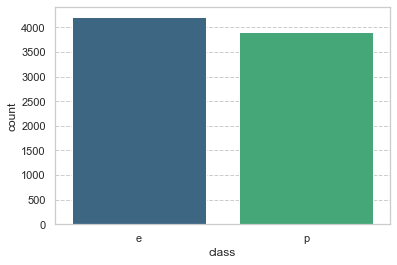

In [141]:
# Class distribution
sns.countplot(data=data,x='class',palette='viridis')
plt.show()

The labels are relatively balanced thus it will be easier to train the classifier.

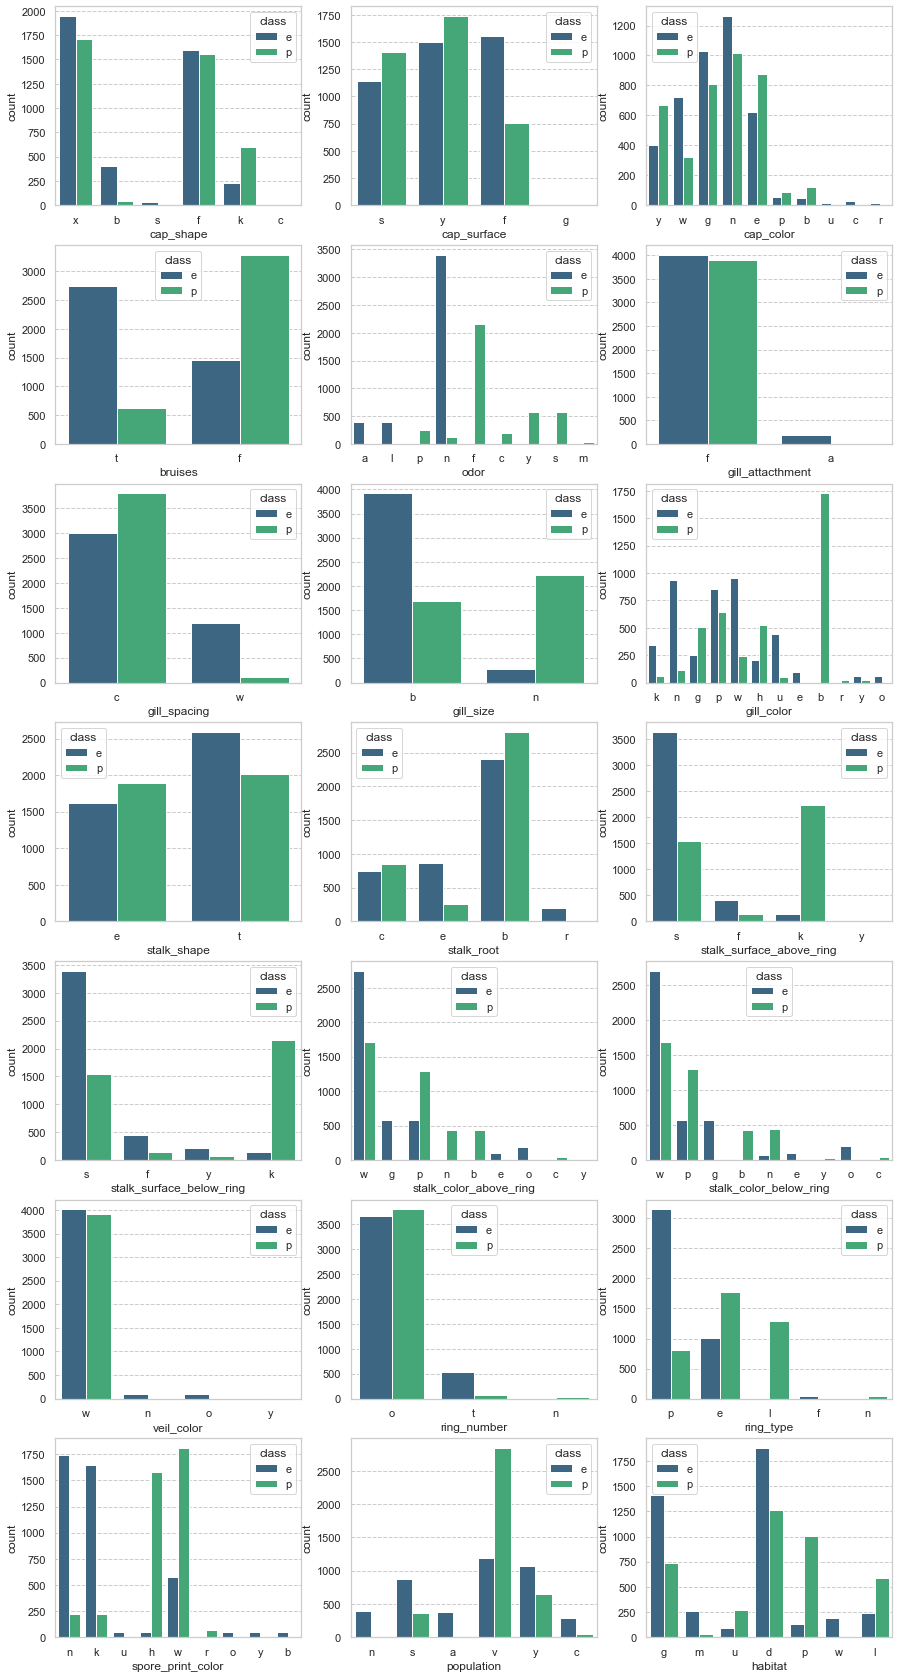

In [194]:
# Edible and Poisonous sample distribution in each attributes 
plt.figure(figsize=(15,30))
col_names = data.columns[1:]
for i in range(0,21,3):
    plt.subplot(7,3,i+1)
    sns.countplot(data=data,x=col_names[i],hue='class',palette='viridis')
    plt.xlabel(col_names[i])
    plt.subplot(7,3,i+2)
    sns.countplot(data=data,x=col_names[i+1],hue='class',palette='viridis')
    plt.xlabel(col_names[i+1])
    plt.subplot(7,3,i+3)
    sns.countplot(data=data,x=col_names[i+2],hue='class',palette='viridis')
    plt.xlabel(col_names[i+2])
    
plt.show()

## 5. Classification

### 5.1 One-Hot-Encoding all the nominal attributes

In [143]:
y = []
for i in data.columns:
    y.append(pd.get_dummies(data[i],prefix=i,drop_first=True))

In [144]:
data_res = pd.concat(y,axis=1)

In [145]:
data_res.head()

,class_p,cap_shape_c,cap_shape_f,cap_shape_k,cap_shape_s,cap_shape_x,cap_surface_g,cap_surface_s,cap_surface_y,cap_color_c,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0


### 5.2 Spliting dataset into train and test data

In [146]:
x = data_res.iloc[:,1:]
y = data_res.iloc[:,0]

In [148]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 27)

In [150]:
print(x_train.shape)
print(x_test.shape)
print(y_train.value_counts())
print(y_test.value_counts())

(6092, 94)
(2031, 94)
0    3171
1    2921
Name: class_p, dtype: int64
0    1037
1     994
Name: class_p, dtype: int64


### 5.2 Feature selection

In [151]:
# feature selection
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=chi2, k=10)
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [152]:
x_train_fs, x_test_fs, fs = select_features(x_train, y_train, x_test)

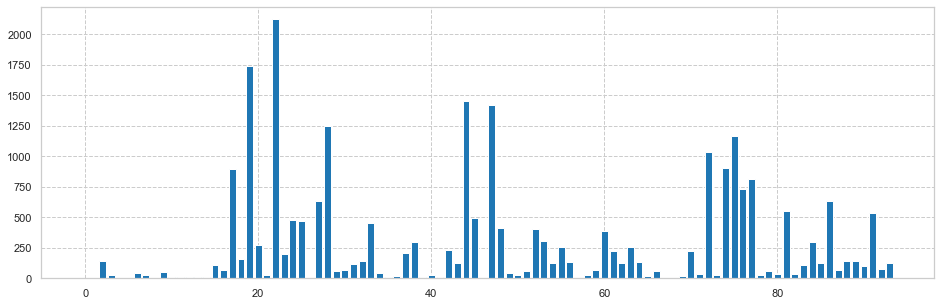

In [153]:
# Plotting scores of each attribute 
plt.figure(figsize=(16,5))
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
# plt.xticks(np.arange(0,94,2))
plt.show()

In [154]:
print(x_train_fs.shape)
print(x_test_fs.shape)

(6092, 10)
(2031, 10)


### 5.3 Model training and evaluation

#### Training without feature selection

In [79]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('DT',  DecisionTreeClassifier()))
models.append(('SVM', SVC()))

In [80]:
# Accuracy for each different K folds
folds = {}
names = []

for name, model in models:
    results = []
    print(name)
    for i in range(2,11):
        kfold = StratifiedKFold(n_splits=i)
        cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
        results.append(cv_results.mean())
    print('Max Acc is for fold %s: %0.3f' % (str(results.index(max(results))+2),(max(results))))
    folds[name] = results

LR
Max Acc is for fold 10: 0.999
LDA
Max Acc is for fold 5: 1.000
DT
Max Acc is for fold 2: 1.000
SVM
Max Acc is for fold 6: 1.000


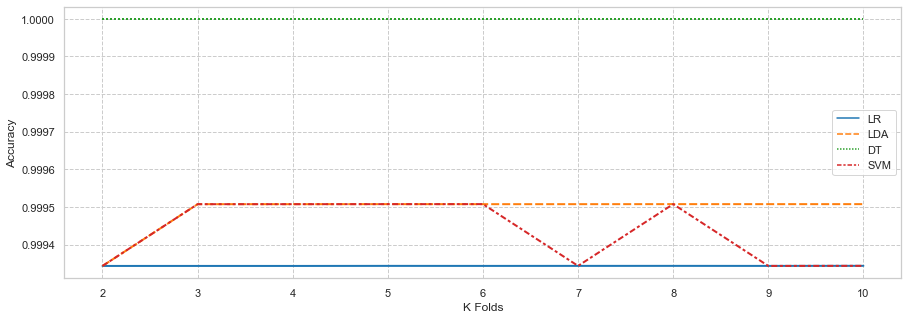

In [81]:
# Plot accuracies for each fold
plt.figure(figsize=(15,5))
ax = sns.lineplot(data=folds,linewidth=2)
ax.set_xticklabels([str(i) for i in range(1,11)])
plt.xlabel('K Folds')
plt.ylabel('Accuracy')
plt.show()

#### Training with feature selection

In [155]:
# Accuracy for each different K folds
folds = {}
names = []

for name, model in models:
    results = []
    print(name)
    for i in range(2,11):
        kfold = StratifiedKFold(n_splits=i)
        cv_results = cross_val_score(model, x_train_fs, y_train, cv=kfold, scoring='accuracy')
        results.append(cv_results.mean())
    print('Max Acc is for fold %s: %0.3f' % (str(results.index(max(results))+2),(max(results))))
    folds[name] = results

LR
Max Acc is for fold 7: 0.978
LDA
Max Acc is for fold 5: 0.959
DT
Max Acc is for fold 7: 0.978
SVM
Max Acc is for fold 7: 0.978


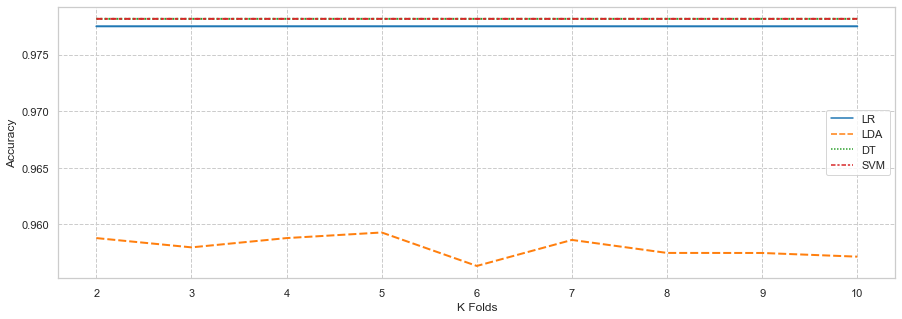

In [156]:
# Plot accuracies for each fold
plt.figure(figsize=(15,5))
ax = sns.lineplot(data=folds,linewidth=2)
ax.set_xticklabels([str(i) for i in range(1,11)])
plt.xlabel('K Folds')
plt.ylabel('Accuracy')
plt.show()

### 6. Prediction

### 6.1 SVM

In [159]:
%%time
# Without feature selection
model = SVC(probability=True)
model.fit(x_train, y_train)
preditions = model.predict(x_test)
print('Accuracy: ', accuracy_score(y_test, preditions) * 100, '\n')
print('Confusion Matrix : \n',confusion_matrix(y_test, preditions), '\n')
print('Classification Report : \n ',classification_report(y_test, preditions))

Accuracy:  100.0 

Confusion Matrix : 
 [[1037    0]
 [   0  994]] 

Classification Report : 
                precision    recall  f1-score   support

           0       1.00      1.00      1.00      1037
           1       1.00      1.00      1.00       994

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031

Wall time: 7.17 s


In [180]:
%%time
# With feature selection
model = SVC(probability=True)
model.fit(x_train_fs, y_train)
preditions = model.predict(x_test_fs)
print('Accuracy: ', accuracy_score(y_test, preditions) * 100, '\n')
print('Confusion Matrix : \n',confusion_matrix(y_test, preditions), '\n')
print('Classification Report : \n ',classification_report(y_test, preditions))

Accuracy:  97.88281634662728 

Confusion Matrix : 
 [[1011   26]
 [  17  977]] 

Classification Report : 
                precision    recall  f1-score   support

           0       0.98      0.97      0.98      1037
           1       0.97      0.98      0.98       994

    accuracy                           0.98      2031
   macro avg       0.98      0.98      0.98      2031
weighted avg       0.98      0.98      0.98      2031

Wall time: 598 ms


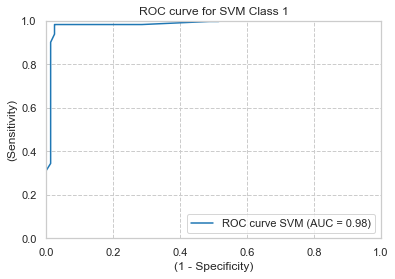

In [181]:
svc_pred_prob = model.predict_proba(x_test_fs)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, svc_pred_prob)
roc_auc = auc(fpr, tpr)
lw = 2
plt.plot(fpr, tpr,label='ROC curve SVM (AUC = %0.2f)' % roc_auc)
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.title('ROC curve for SVM Class 1')
plt.xlabel('(1 - Specificity)')
plt.ylabel('(Sensitivity)')
plt.grid(True)
plt.legend(loc="lower right")
plt.show()

### 6.2 Decision Tree Classifier 

In [161]:
%%time
# Without feature selection
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
preditions = model.predict(x_test)
print('Accuracy: ', accuracy_score(y_test, preditions) * 100, '\n')
print('Confusion Matrix : \n',confusion_matrix(y_test, preditions), '\n')
print('Classification Report : \n ',classification_report(y_test, preditions))

Accuracy:  100.0 

Confusion Matrix : 
 [[1037    0]
 [   0  994]] 

Classification Report : 
                precision    recall  f1-score   support

           0       1.00      1.00      1.00      1037
           1       1.00      1.00      1.00       994

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031

Wall time: 55.9 ms


In [182]:
%%time
# With feature selection
model = DecisionTreeClassifier()
model.fit(x_train_fs, y_train)
preditions = model.predict(x_test_fs)
print('Accuracy: ', accuracy_score(y_test, preditions) * 100, '\n')
print('Confusion Matrix : \n',confusion_matrix(y_test, preditions), '\n')
print('Classification Report : \n ',classification_report(y_test, preditions))

Accuracy:  97.88281634662728 

Confusion Matrix : 
 [[1011   26]
 [  17  977]] 

Classification Report : 
                precision    recall  f1-score   support

           0       0.98      0.97      0.98      1037
           1       0.97      0.98      0.98       994

    accuracy                           0.98      2031
   macro avg       0.98      0.98      0.98      2031
weighted avg       0.98      0.98      0.98      2031

Wall time: 24.9 ms


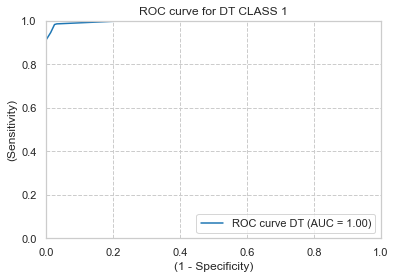

In [183]:
dt_pred_prob = model.predict_proba(x_test_fs)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, dt_pred_prob)
roc_auc = auc(fpr, tpr)
lw = 2
plt.plot(fpr, tpr,label='ROC curve DT (AUC = %0.2f)' % roc_auc)
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.title('ROC curve for DT CLASS 1')
plt.xlabel('(1 - Specificity)')
plt.ylabel('(Sensitivity)')
plt.grid(True)
plt.legend(loc="lower right")
plt.show()

### 6.3 Linear Discriminant Analysis

In [165]:
%%time
# Without feature selection
model = LinearDiscriminantAnalysis()
model.fit(x_train, y_train)
preditions = model.predict(x_test)
print('Accuracy: ', accuracy_score(y_test, preditions) * 100, '\n')
print('Confusion Matrix : \n',confusion_matrix(y_test, preditions), '\n')
print('Classification Report : \n ',classification_report(y_test, preditions))

Accuracy:  99.9507631708518 

Confusion Matrix : 
 [[1037    0]
 [   1  993]] 

Classification Report : 
                precision    recall  f1-score   support

           0       1.00      1.00      1.00      1037
           1       1.00      1.00      1.00       994

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031

Wall time: 194 ms


In [178]:
%%time
# With feature selection
model = LinearDiscriminantAnalysis()
model.fit(x_train_fs, y_train)
preditions = model.predict(x_test_fs)
print('Accuracy: ', accuracy_score(y_test, preditions) * 100, '\n')
print('Confusion Matrix : \n',confusion_matrix(y_test, preditions), '\n')
print('Classification Report : \n ',classification_report(y_test, preditions))

Accuracy:  96.01181683899557 

Confusion Matrix : 
 [[981  56]
 [ 25 969]] 

Classification Report : 
                precision    recall  f1-score   support

           0       0.98      0.95      0.96      1037
           1       0.95      0.97      0.96       994

    accuracy                           0.96      2031
   macro avg       0.96      0.96      0.96      2031
weighted avg       0.96      0.96      0.96      2031

Wall time: 36.9 ms


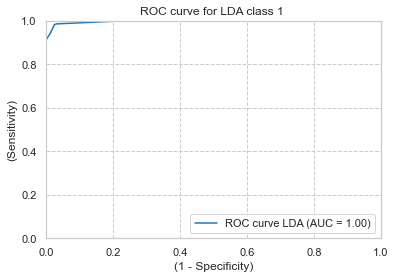

In [184]:
lda_pred_prob = model.predict_proba(x_test_fs)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, lda_pred_prob)
roc_auc = auc(fpr, tpr)
lw = 2
plt.plot(fpr, tpr,label='ROC curve LDA (AUC = %0.2f)' % roc_auc)
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.title('ROC curve for LDA class 1 ')
plt.xlabel('(1 - Specificity)')
plt.ylabel('(Sensitivity)')
plt.grid(True)
plt.legend(loc="lower right")
plt.show()